In [19]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

from os import listdir
from os.path import isfile, join

from PIL import Image 
import PIL

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

ruta_directorio = 'empleos_linkedin/'

onlyfiles = [f for f in listdir(ruta_directorio) if isfile(join(ruta_directorio, f))]
onlyfiles

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['bahia_software.txt',
 'excelia.txt',
 'ntt data.txt',
 'ntt_data_english.txt',
 'plexus.txt']

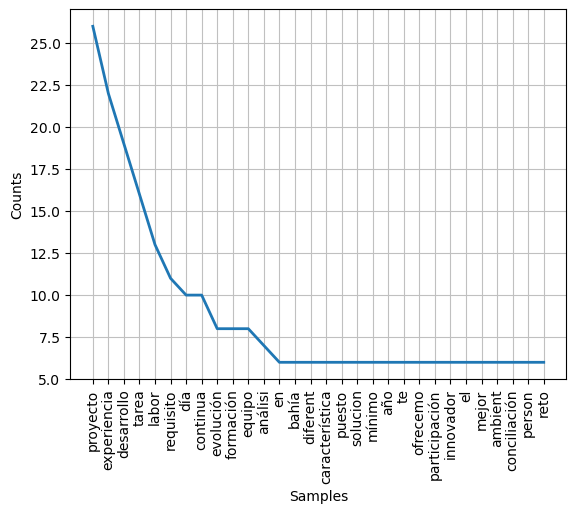

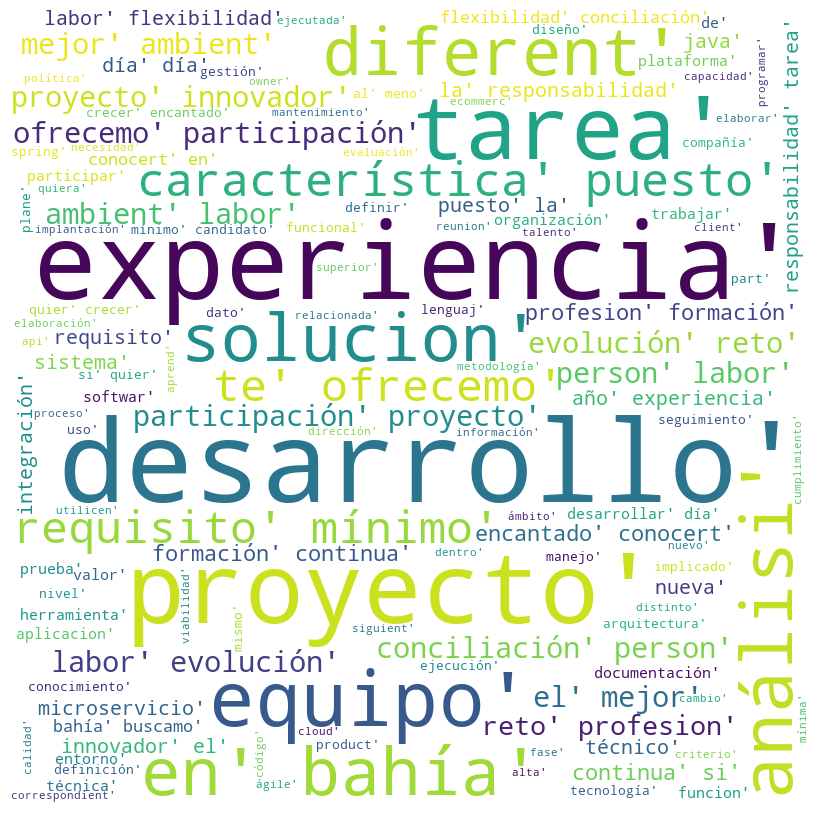

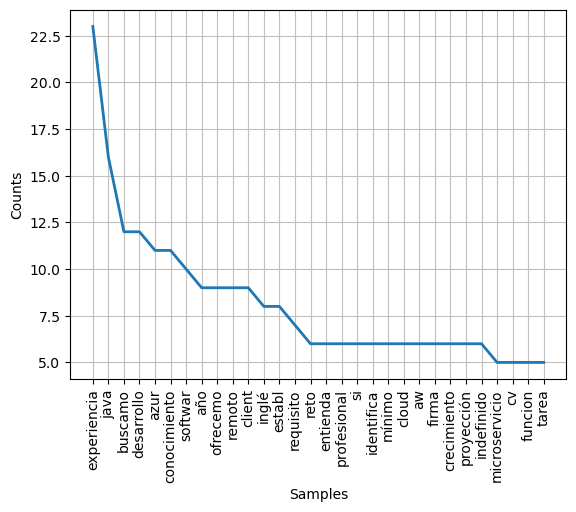

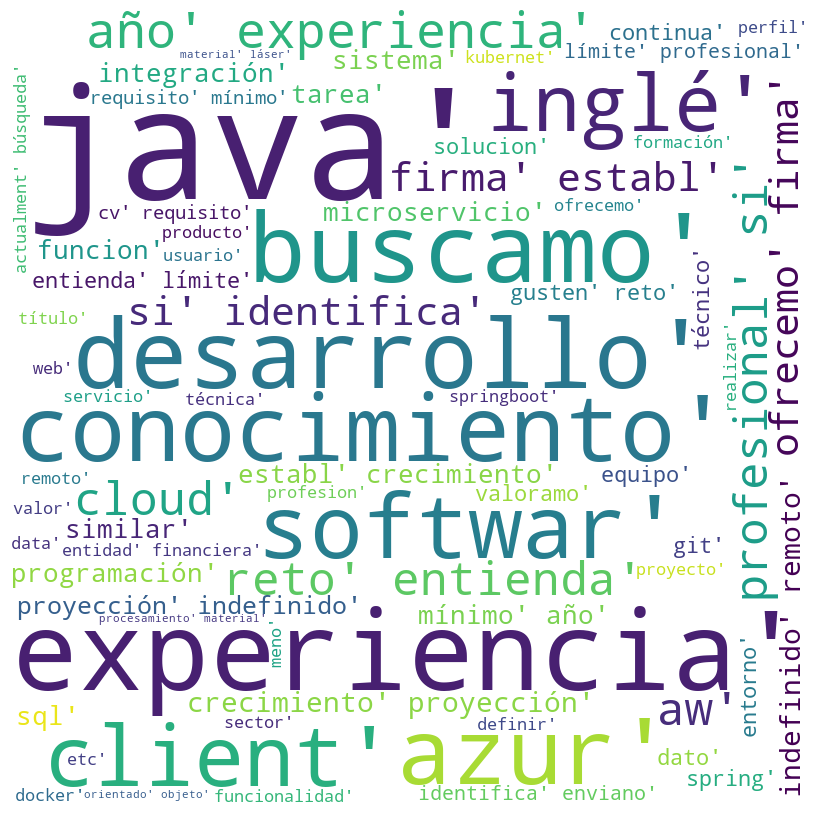

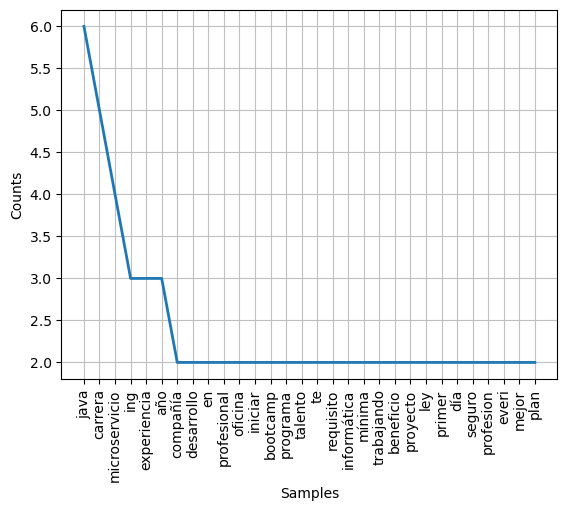

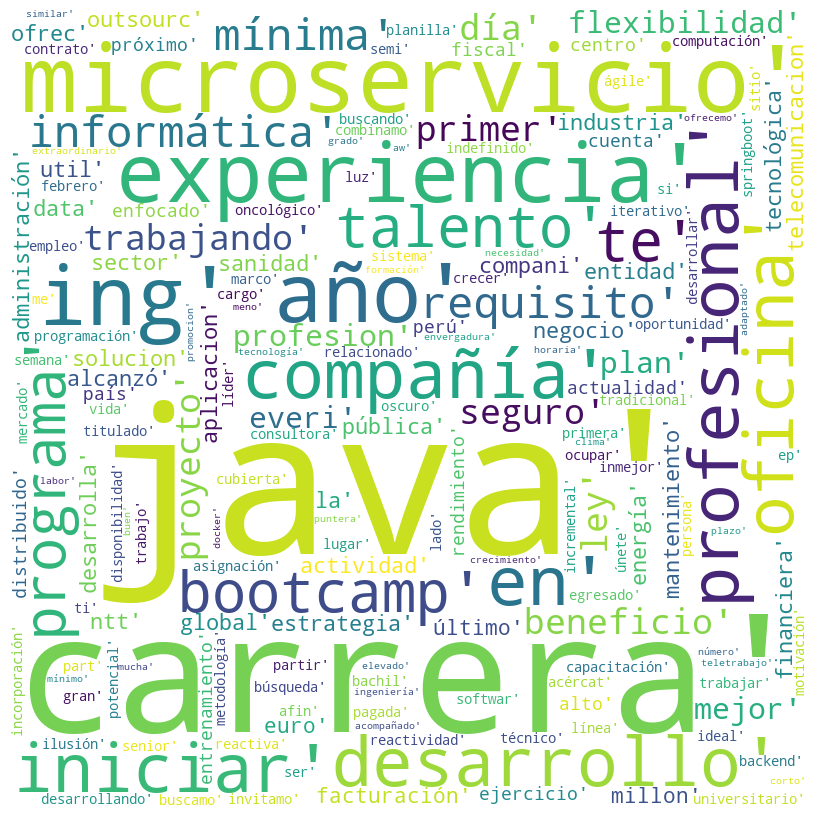

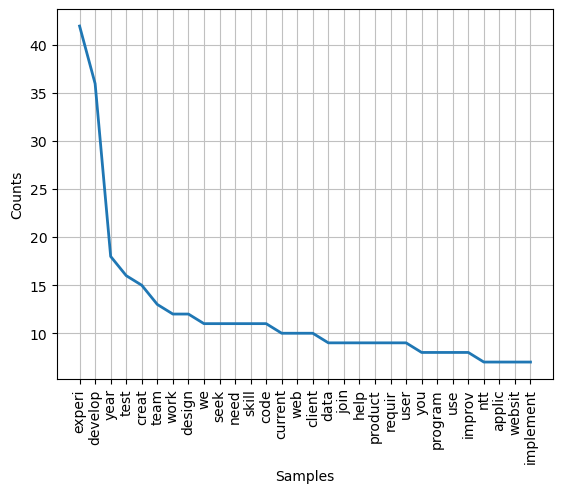

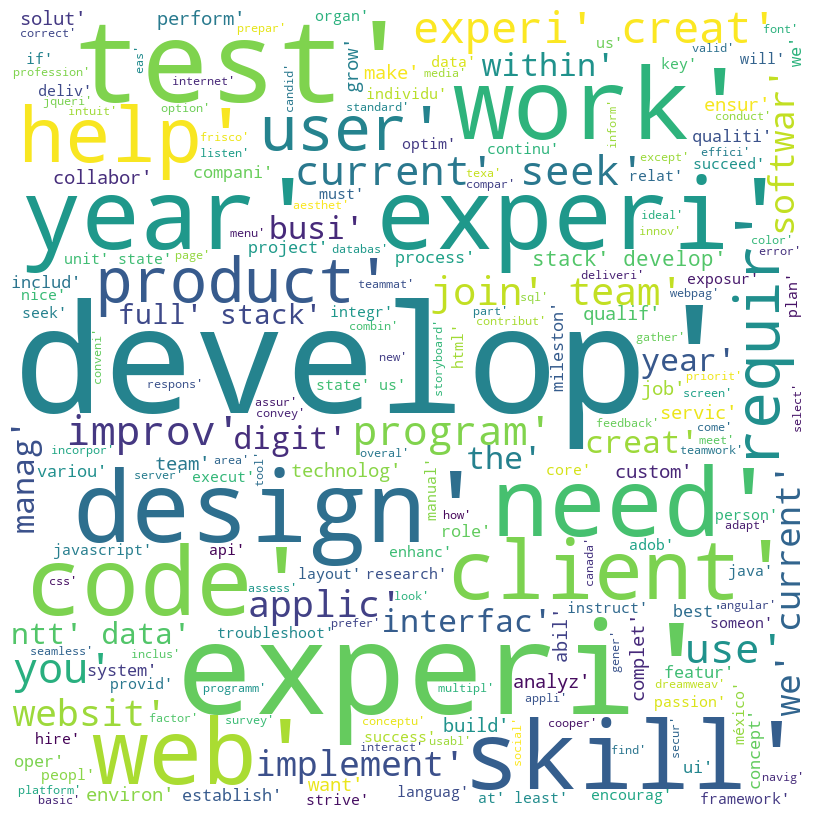

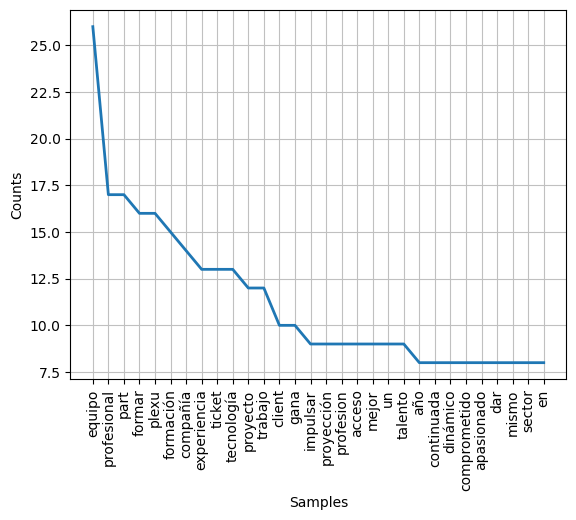

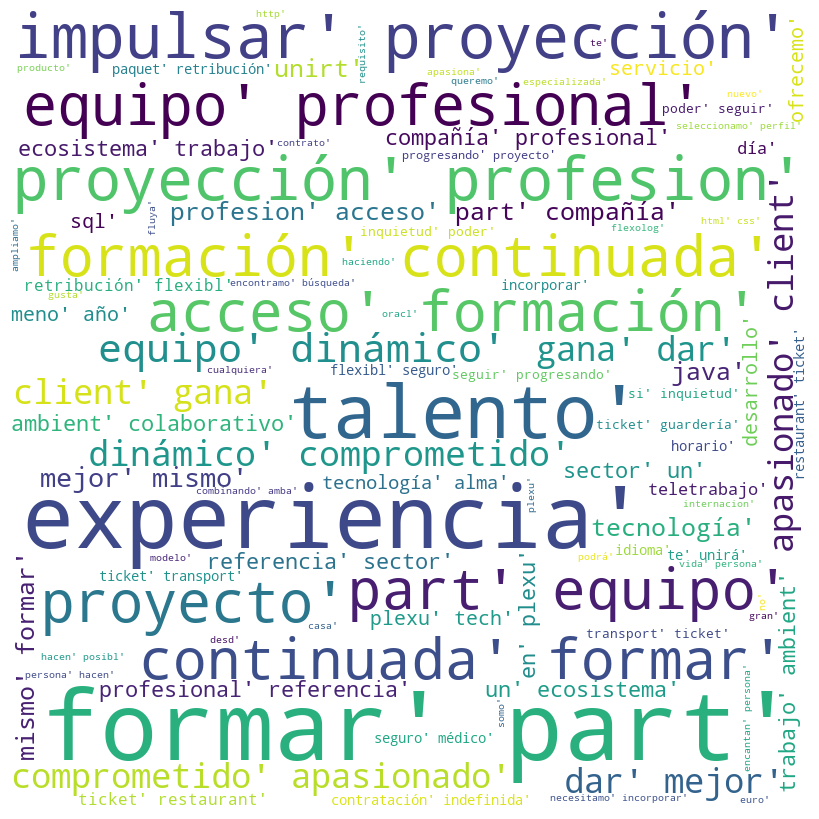

In [20]:
texto_stemizado_global = []

for file in onlyfiles:
    text_website = open(ruta_directorio + file).read()

    ps = PorterStemmer()
    preprocessedText = []

    texto_tokenizado = word_tokenize(text_website)

    #Tenemos texto TOKENIZADO
    texto_tokenizado = texto_tokenizado

    #Stopwords del idioma español
    if 'english' in file:
        stops = set(stopwords.words("english"))
    else:
        stops = set(stopwords.words("spanish"))

    #Obtenemos texto STEMIZADO
    texto_stemizado = [ps.stem(word) for word in texto_tokenizado if not word in stops and word.isalpha()]
    #texto_stemizado2 = " ".join( [ps.stem(word) for word in texto_tokenizado if not word in stops and word.isalnum()] )
    texto_stemizado2 = str(texto_stemizado)
    texto_stemizado_global += texto_stemizado
    
    #print(texto_stemizado)
    
    nlp_words = nltk.FreqDist(texto_stemizado)
    image_dist = nlp_words.plot(30)
    image_dist.get_figure().savefig(ruta_directorio + '/images/'+ file.replace(".txt",""), bbox_inches = "tight")
    
    wordcloud = WordCloud(width = 800, 
                height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate( texto_stemizado2 )
    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig(ruta_directorio + '/wordclouds/'+ file.replace(".txt",""))
    plt.show()

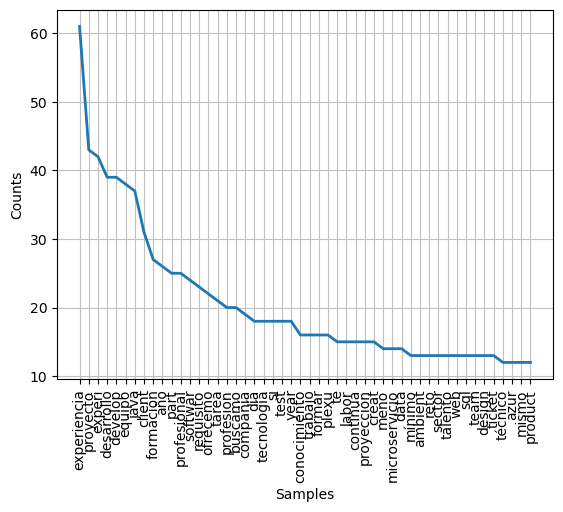

3877


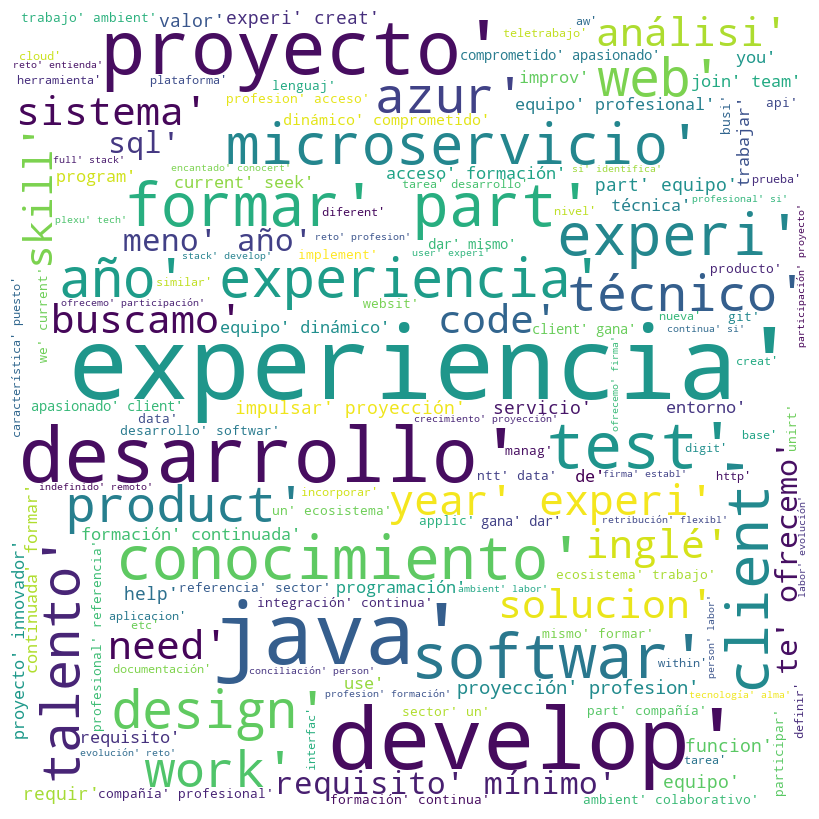

In [23]:
listaProhibidas = ['cooki', 'dato', 'la', 'el', 'en', 'a', 'consentimiento', 'así', 'caso', 'preferencia'
                   , 'cualquier', 'mejor', 'cada', 'forma', 'sitio', 'no']
texto_stemizado_global = [word for word in texto_stemizado_global if word not in listaProhibidas]

nlp_words2 = nltk.FreqDist(texto_stemizado_global)
image_dist = nlp_words2.plot(50) 
#print(texto_stemizado_global)
print(len(texto_stemizado_global))


wordcloud = WordCloud(width = 800, 
                height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate( str(texto_stemizado_global) )

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_images/'+ file.replace(".txt",""))
plt.show()